In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from sklearn.utils import shuffle


infilen = open("neg_pos_rev.xml","r")
contents = infilen.read()
soup = BeautifulSoup(contents,'xml')

#print(soup.prettify())
ratings = soup.find_all('rating')
rev_txt = soup.find_all('review_text')
titles= soup.find_all('title')
print(len(ratings))
print(len(rev_txt))
print(len(titles))

2000
2000
2000


In [6]:
stopwords=[]
for word in open('stopword_short_long.txt'):
    #print(word)
    stopwords.append(word.replace('\n',''))
#print(stopwords)

In [7]:
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10
rating_=[]
rev_txt_=[]
title_=[]

def txt_check(text):
    for ch in ['\\','`','\"','*','_','{','}','[',']','(',')',';','@','^','&','>','#','+',':','-','_','=','|','>','<','~','.','!','$','/',',','?','%','0','1','2','3','4','5','6','7','8','9']:
        if ch in text:
            text=text.replace(ch," ")
    return text    

def stopword_drop(text):
    txt=[]
    for i in text:
        if i in stopwords:
            pass
        else:
            txt.append(i)            
    return txt


def txt_drop(text):
    txt=[]
    for i in text:
        if len(i)>2:
            txt.append(i)
        
    return txt        

txt_g=[]
txt_i=[]
txt_ii=[]
for i in range(0,len(ratings)):   #len(ratings)
    #print(ratings[i].get_text())

    txt1=txt_check(rev_txt[i].get_text()).lower().replace('\n'," ").strip().split(" ")
    txt2=txt_drop(txt1)
    txt3=stopword_drop(txt2)
    txt4=list(set(txt3)) #remove repetition from sentence list txt3
    txt_i.append(txt3)     #txt_i has double/triple ... count good for raw count
    txt_ii.append(txt4)   #txt_ii has no double count good for binary
    txt_g.extend(txt4)

    
#print(len(txt_i))    
#print(len(txt_g))
txt_gf_n=list(set(txt_g))
print(len(txt_gf_n)) 




10158


In [49]:
#aList = [123, 'xyz', 'zara', 'abc', 123];
#print "Count for 123 : ", aList.count(123)
#print "Count for zara : ", aList.count('zara')
count_word=np.zeros((len(ratings),len(txt_gf_n)))
count_word2=np.zeros((len(ratings),len(txt_gf_n)))
for i in range(0,len(ratings)):
    for j in range(len(txt_gf_n)):
        count_word[i,j]=txt_i[i].count(txt_gf_n[j])     #based on raw count
        count_word2[i,j]=txt_ii[i].count(txt_gf_n[j])   #based on binary

print(np.max(count_word))
print(np.max(count_word2))
txt_gf_n[6510]

20.0
1.0


'quality'

In [50]:
print(np.shape(count_word))

(2000, 10158)


In [51]:
N=2000
D=len(txt_gf_n)
ones=np.array([[1]*N]).T
Y=np.random.randn(N)
Y[:1000]=0
Y[1000:]=1

X1=count_word
X2=count_word2
X=count_word

X,Y=shuffle(X,Y)

Xtrain=np.random.randn(1400,D)
Xtest=np.random.randn(600,D)


Xtrain=X[:-600,:]
Ytrain=Y[:-600]

Xtest=X[-600:,:]
Ytest=Y[-600:]

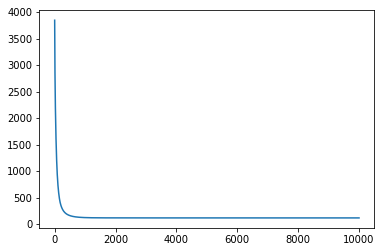

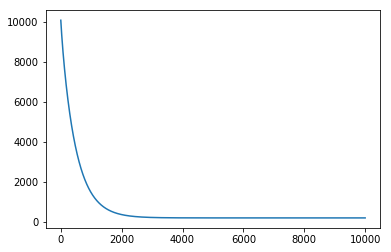

In [52]:
w=(np.random.randn(D))

Xn=Xtrain
T_target=Ytrain
z=np.dot(Xn,w)

epsilon=1e-10
iteration=10000
wbackup=w
w_mag=[]
j_cost=[]

def sigmoid(z):
    return 1/(1+np.exp(-z))


alpha=0.001    # learning rate
lambda_=1

Y_n=sigmoid(z)

def cross_entropy_err(Yp,t):
    
    Err=(-1.0*(t*np.log(Yp+epsilon)+(1.0-t)*np.log(1-Yp+epsilon)))
    return np.sum(Err)



for time in range(iteration):

    derivative=np.dot(Xn.T,(T_target-Y_n))-lambda_*w            #keep the weights from overgrowing to make maximum liklihood maximum
    w=w+alpha*derivative                              #using lambda*w make maximum posterior not liklihood -lambda*w make the convergance faster
    Y_n=sigmoid(np.dot(Xn,w))

  
    if (time%1==0):

        j_cost.append(cross_entropy_err(Y_n,T_target))
        w_mag.append(np.dot(w.T,w))

#print('lambda =0.0, w,time,J',w,time,cross_entropy_err(Y_n,T_target))
plt.plot(j_cost,label='lambda= 0.0')
plt.show()
plt.plot(w_mag,label='w_mag')
plt.show()


In [59]:
for i in range(len(txt_gf_n)):
    print(w[i],txt_gf_n[i])
    
print('Classificatio rate:', 1-np.abs(T_target-np.round(Y_n)).sum()/1400)

-0.002495092307875827 void
0.003019222504876719 carousel
2.3138094225517347e-05 thieves
3.537256933247836e-05 nutshell
0.004442193643988564 lessons
0.41138007261800613 netgear
0.017514581515831726 discrete
-0.05610540977057743 migraine
0.02458461656855105 miscalculated
3.2707561722755384e-05 promotion
0.08491420042962118 sear's
-0.22665633830864604 maxell
3.711640467414897e-05 elite
1.2909876973926685e-05 imperfections
0.006507283455461723 positive
-6.69801728430951e-05 wiggle
0.010212742061643246 turnaround
0.17774864707544957 current
-0.1277325941661853 agreed
-5.3480643682217177e-05 instread
1.447442801809276e-05 member
-0.00826958672615399 oversized
-0.10768980587038769 vista
-0.00020470462491525872 fyi
-0.0036397944894087726 bill
-0.0029908359088903244 nonstandard
0.078059399730348 scans
0.05903208235803475 recalculate
0.04777252104632764 fob
-0.03332278870006894 tunebase
-0.015296211123373324 pavilion
0.0001841794811780484 cite
-0.03451684374163169 knowlege
0.05060916018918724 sw

0.010639735287472942 replaceable
-0.0024755028212890312 verified
0.2010257066438366 qualit
-0.03503374097294272 triggering
0.06542733663174403 volt
0.2674894027033073 nano
0.0003151671706928641 warmth
-0.21953314272340763 reliability
-0.28238017638982116 canceling
-0.0009195299852490051 spec'ed
-4.0010237000155305e-05 gigabytes
0.02681205469437823 vcrs
-0.009863805385544044 rows
1.0598922166704329e-05 burners
6.9892841222536524e-06 logical
-0.04788388486943815 reaches
0.04046173607516593 enjoyable
-0.024390550979597834 exit
-0.0981653091926948 fortunately
0.07453928515548688 vision
-0.009186878462968824 dummies
-0.11059089384608455 endlessly
-0.26672599012587395 amazingly
-5.1607423299174266e-05 keen
0.111232020038224 merchant
0.00046573361428081314 unbearable
-0.05589893765837502 inconvenient
-0.05620913949782994 posts
0.04921537046198779 budget
0.19451796250287628 acquire
-0.32886482510564685 incoming
0.014937600554656353 bummed
-0.018622634780615332 deadline
0.06165362948005942 seem

-0.05725894937459983 ammount
-0.007548909679408142 microwaves
0.3240172544191162 settle
-0.1311693805246472 hurry
-0.07688603117855522 zipper
-0.020150748874302824 delayed
0.006947521640676372 colleague
-0.05186371492726774 exposed
-0.0651476412598471 nonsense
0.1910948333995555 endless
0.06128573392255185 web
-4.8523745103781974e-05 bookshelves
0.0631892557364318 subway
-0.19280591601502964 follow
3.478988031807311e-05 deregisters
1.059820596303176e-05 cfm
-0.03946422337795657 bazillion
0.038353572716935964 apple's
0.06951795923715036 unpleasant
0.03487813908645127 cï¿½moda
-0.11231233402039362 strong
1.856302047744065e-05 replay
0.03882361064736861 dry
1.0069414432878143e-05 multitracking
4.497545853791535e-06 blur
0.24755874893320937 prevent
4.807836288232446e-05 viking
0.20600204648159068 position
-0.33828563741852397 cut
-0.017292852836159046 eartips
-0.02214014604699988 horror
-1.5617627415410112e-05 confusingly
0.16435819019710787 coverage
0.20099661682476472 originals
-2.574979

0.0008491977895254753 verbatim's
0.053134520730705695 adjusts
-0.015598505930818988 'trying'
-0.009123524959889747 claimed
0.24472277009376803 dvi
-0.04361273079472529 enroute
-0.017188170747708235 weirdly
0.08814324939304659 pause
-0.08532161715794374 whirls
0.1428836243488299 buffer
4.465116019628721e-05 swapped
-0.01101471283490757 encrypt
-0.07212948504245716 actively
-0.09320921270326872 experienced
-0.07494291488766595 overused
0.021910239085173616 deficient
1.530762714333126e-05 drastic
3.476558223536538e-05 honey
-0.15780453206282186 voice
-0.07463788661551558 peeling
0.004441101571925878 satisfing
0.1848514954682282 block
-0.00010647322766463216 atachee
-0.18852586234361277 packs
-9.976815148061403e-06 turntable
-0.23183234063885727 network
0.06737658559533118 connectivity
0.009507899338387743 cities
-0.09845099475115336 irritating
0.011825131605798933 converted
3.3504207048620406e-07 contributing
0.006082320200557059 teriffic
0.07990355897780703 wzc
-0.10792705914223237 map
0

3.193758258965563e-05 mappoint
-0.16528925249284163 bandwidth
-0.0008263802828564706 degrades
0.04357011244497773 lane
0.05938740483107009 category
0.46959829694847727 pictures
2.0287209528444522e-05 chin
-0.11663750256742945 misrepresent
-0.19166910359894773 dispite
0.004010968570100903 impedance
3.3244609312445824e-05 airwaves
-0.1835175186547635 burned
0.00030753385343063906 surged
-0.3301850525353359 pointed
0.08322881055637749 recordings
3.5454928738433133e-06 url
-0.035210332998676264 processors
-0.015299401314149657 crossed
0.1304426983831683 tripp
7.308822122904152e-05 cautious
2.30325596187375e-05 policies
0.02656971639141355 tangled
-0.09826556153522963 royal
-0.039591998807964 warrenty
3.879118723778626e-05 warrarnty
-1.3873814619218768e-05 eating
-0.07271657853791395 altogether
-0.05919135939519304 donate
-0.36686588337502535 apart
-0.03475273036369539 sonys
0.05065120506539856 elevator
-0.0037006093999132684 flea
-0.19075836694562276 breaks
-3.1468280330099246e-05 hopi
0.0

-0.023141364461041532 neighbors
0.0756550203646148 degraded
0.051794394163202764 setups
-0.06283268885703241 segate
-0.03120519578144266 videohelp
8.446309923028738e-05 raiders
-0.09894472266121832 merchandise
0.37493862996308636 spindles
1.527534999884207e-05 silvery
0.05571785855129689 withstand
0.21614813046844533 heat
0.062454592377122316 mignon
0.01496244130510304 accumulated
-0.05603018650649359 destructs
-9.343850512952219e-05 literature
0.05996198281028094 qam
-0.08752066266893883 luckier
-2.2824966009827303e-05 und
0.09313242278877061 paced
0.6281118227103294 rebate
-0.005195225404350849 int'l
0.05881327646861966 ramps
-0.15063054678661902 naturally
-2.8452897321647926e-05 klipsh
0.050307169455428666 weekend
0.09124135059373442 aiwa
-0.009853579438619819 crashing
0.0003111837019382808 scanned
0.2267460860205565 makers
-0.017575612079412044 quiet
2.5584930547955393e-05 negligence
-0.2668511493481686 understand
-7.263445429927422e-05 labelers
0.05971761573800224 tupperware
0.147

-4.4726302716718674e-05 saturated
-0.025873557025681403 idle
-0.17398524921988187 workers
5.8082559648157634e-05 blurb
-0.020407733396522278 thanksgiving
0.002545023917541505 tracks
-3.546086859111629e-06 clerk
0.003604074690333867 physically
-0.04284749015129005 ice
3.422863151944388e-05 underpowered
7.75342333682683e-05 offsets
9.724824298430659e-05 beautifull
-0.05219500324330715 bait
-0.30030902358050227 tigerdirect
-0.009337422737325057 programmer
0.17270660690871195 htz
0.308619689913544 middle
-0.029453726971640143 acceptably
-0.016865218905762484 ibook
0.006153214378220542 eaten
-0.03131640119175938 overlook
-0.00023025789524828738 confirmation
-0.12992171969514252 rural
-0.0011101148495308113 culprit
0.014214451247240472 kid
-0.13929283214700308 barcode
0.1490559967920262 america
0.019655441550799787 buffing
-0.016194542302113885 entry
1.284610877923661e-06 pasted
0.007396098425535664 landscape
-0.07160334499392519 carefully
0.142004804711347 care
-0.04872924007867052 habit
0.

0.05557370358862256 drawer
-2.5061403131671274e-05 crossover
-1.076688350057287e-05 emap
0.03112470306690811 mitsubishi
-0.09426664574333986 compound
0.026737694281573056 watched
0.26597127690000727 retractable
-0.07798974667658294 gears
0.058776107412160765 backpacking
-0.017013734912243565 ruling
-0.09136728071111858 bureau
-0.03126681555310494 verifying
0.014068655793206935 usb
-0.09107315222842548 visible
8.62079169519175e-05 mistakes
-0.038623976046834055 institution
-0.3544257739189937 starting
0.07818433631961456 field
0.00959778764604873 crystal
2.1729702461169508e-07 acomadate
-5.850901020312334e-05 nozzle
-0.04922690929718171 labor
-0.06788827985637834 suitable
-0.05775737795940253 figuring
-0.1612158249645164 repeat
0.13718853810041098 selectivity
-0.06249600923603557 injected
0.00021871464976599536 supremecy
-0.03924800874096518 law
-1.9999764459919577e-06 feared
0.534518371155734 video
0.12654837305792727 forums
0.004979535969405764 installs
0.020155816646030663 sealing
0.

In [60]:
Y_p_test=sigmoid(np.dot(Xtest,w))
print('Classificatio rate train:', 1-np.abs(T_target-np.round(Y_n)).sum()/1400)
print('Classificatio rate test:', 1-np.abs(Ytest-np.round(Y_p_test)).sum()/600)

Classificatio rate train: 0.9978571428571429
Classificatio rate test: 0.76


In [64]:
list_high_w=[]
list_high_word=[]

for i in range(len(txt_gf_n)):
    j=0
    if(w[i]>0.6) or (w[i]<-0.6):
        
        print(w[i],txt_gf_n[i])
        list_high_w.append(w[i])
        list_high_word.append(txt_gf_n[i])
        
        j=j+1


-0.7378385135981035 weeks
0.8156316454724197 perfectly
0.7502248548170672 amazing
1.371432799619689 highly
0.6235127993173158 expected
0.6116994715314432 performed
0.6100444594189742 nicely
-0.6119153819130018 things
0.9501625472311032 best
0.6772931516946608 wrist
-0.952901153455791 waste
0.6073729287084684 expensive
-0.6647435618801022 barely
-0.6468841463410566 worse
-0.6204893535937432 worthless
-0.8833467551677969 year
-0.8144163438396763 bad
-0.8441196517028858 started
-0.8146810495502175 disappointed
-0.690894587696667 memorex
-0.7842920511395938 help
-0.612274905670964 happened
0.6513829137226924 easier
-0.6321674278417444 ears
0.6882868426925545 faster
0.8281636923785648 glad
0.6708718809035599 works
0.855506053591818 fast
-0.6269914806863852 worst
-0.8378267320333584 work
-1.4799316797931752 return
-0.8179956709910878 money
0.726831307420706 outstanding
-0.7369181442389579 products
-0.9989403354744381 returning
-1.2371186053952818 terrible
1.1667173526558052 price
0.679653230

In [65]:
zipped=zip(list_high_w,list_high_word) 
#print(list(zipped))
sorted(zipped, key=lambda x: x[0])

[(-1.4799316797931752, 'return'),
 (-1.2371186053952818, 'terrible'),
 (-1.2370564833364075, 'poor'),
 (-1.0241656731903879, 'returned'),
 (-0.9989403354744381, 'returning'),
 (-0.952901153455791, 'waste'),
 (-0.9359514311848378, 'true'),
 (-0.8833467551677969, 'year'),
 (-0.8678259552432412, 'live'),
 (-0.8607256171413507, 'called'),
 (-0.8441196517028858, 'started'),
 (-0.8397591735431618, 'cost'),
 (-0.8378267320333584, 'work'),
 (-0.8179956709910878, 'money'),
 (-0.8146810495502175, 'disappointed'),
 (-0.8144163438396763, 'bad'),
 (-0.7842920511395938, 'help'),
 (-0.7564480721011807, 'useless'),
 (-0.7409492564472491, 'version'),
 (-0.7378385135981035, 'weeks'),
 (-0.7369181442389579, 'products'),
 (-0.7279279328727609, 'idea'),
 (-0.7219846299370852, 'error'),
 (-0.7055350699655013, 'labels'),
 (-0.690894587696667, 'memorex'),
 (-0.6761795316628634, 'died'),
 (-0.6715087033765186, 'cheap'),
 (-0.6652441581506529, 'hope'),
 (-0.6647435618801022, 'barely'),
 (-0.664669601451837, 'gu

In [80]:
def accuracy_rate(Y,T):   #make sure T(i) is also rounded
    
    N=len(T)
    print('Assume 1 is True for Actual data, False is 0')
    print('Classificatio rate:', 1-np.abs(T-np.round(Y)).sum()/N)
    print('----------------------------------------------------------')
    #cond_pos=N-np.abs(1.0-np.round(Y)).sum()
    #cond_neg=N-np.abs(0.0-np.round(Y)).sum()
    
#    TP FP
#    FN TN
    
    c_tp=0
    c_fp=0
    c_tn=0
    c_fn=0
    cond_pos=0
    cond_neg=0
    pred_pos=0
    pred_neg=0
    
    for i in range(len(T)):
        
        if(T[i]==np.round(Y[i]) and np.round(T[i])==1.0):
            c_tp=c_tp+1
            
        if(T[i]==np.round(Y[i]) and np.round(T[i])==0.0):
            c_tn=c_tn+1 
            
        if(T[i]!=np.round(Y[i]) and np.round(T[i])==1.0):
            c_fn=c_fn+1
            
        if(T[i]!=np.round(Y[i]) and np.round(T[i])==0.0):
            c_fp=c_fp+1  

        if(np.round(T[i])==1.0):
            cond_pos=cond_pos+1
            
        if(np.round(T[i])==0.0):
            cond_neg=cond_neg+1   
            
        if(np.round(Y[i])==1.0):
            pred_pos=pred_pos+1
            
        if(np.round(Y[i])==0.0):
            pred_neg=pred_neg+1             
            
    TPR=c_tp/(cond_pos)
    TNR=c_tn/(cond_neg) 
    FNR=c_fn/(cond_pos)
    FPR=c_fp/(cond_neg)
    
    recall=TPR
    precision=c_tp/(pred_pos)
    F1=2*recall*precision/(recall+precision)
    
    ROC=TPR/FPR
    ROC2=TNR/FNR

    print(c_tp,c_fp)  
    print(c_fn,c_tn) 
    print('--------------')
    print('TPR=',TPR,'FPR=',FPR)
    print('FNR=',FNR,'TNR=',TNR)
    print('--------------')
    print('ROC=>TPR/FPR',ROC)
    print('ROC2=>TNR/FNR',ROC2)
    print('--------------')
    print('Recall=',recall,'precision=',precision,'F1_score=',F1)
    print('\n')
    print('\n')
accuracy_rate(Y_p_test,Ytest)
accuracy_rate(Y_n,Ytrain)

Assume 1 is True for Actual data, False is 0
Classificatio rate: 0.76
----------------------------------------------------------
223 86
58 233
--------------
TPR= 0.7935943060498221 FPR= 0.26959247648902823
FNR= 0.20640569395017794 TNR= 0.7304075235109718
--------------
ROC=>TPR/FPR 2.943681204998758
ROC2=>TNR/FNR 3.5386985190790186
--------------
Recall= 0.7935943060498221 precision= 0.7216828478964401 F1_score= 0.7559322033898305




Assume 1 is True for Actual data, False is 0
Classificatio rate: 0.9978571428571429
----------------------------------------------------------
718 2
1 679
--------------
TPR= 0.9986091794158554 FPR= 0.002936857562408223
FNR= 0.0013908205841446453 TNR= 0.9970631424375918
--------------
ROC=>TPR/FPR 340.02642559109876
ROC2=>TNR/FNR 716.8883994126285
--------------
Recall= 0.9986091794158554 precision= 0.9972222222222222 F1_score= 0.9979152189020153






In [19]:

row_=[]
for i in range(0,len(ratings)):
    row__=np.sum(count_word[i,:])
    row_.append(row__)
    
print(np.max(row_))    

424.0


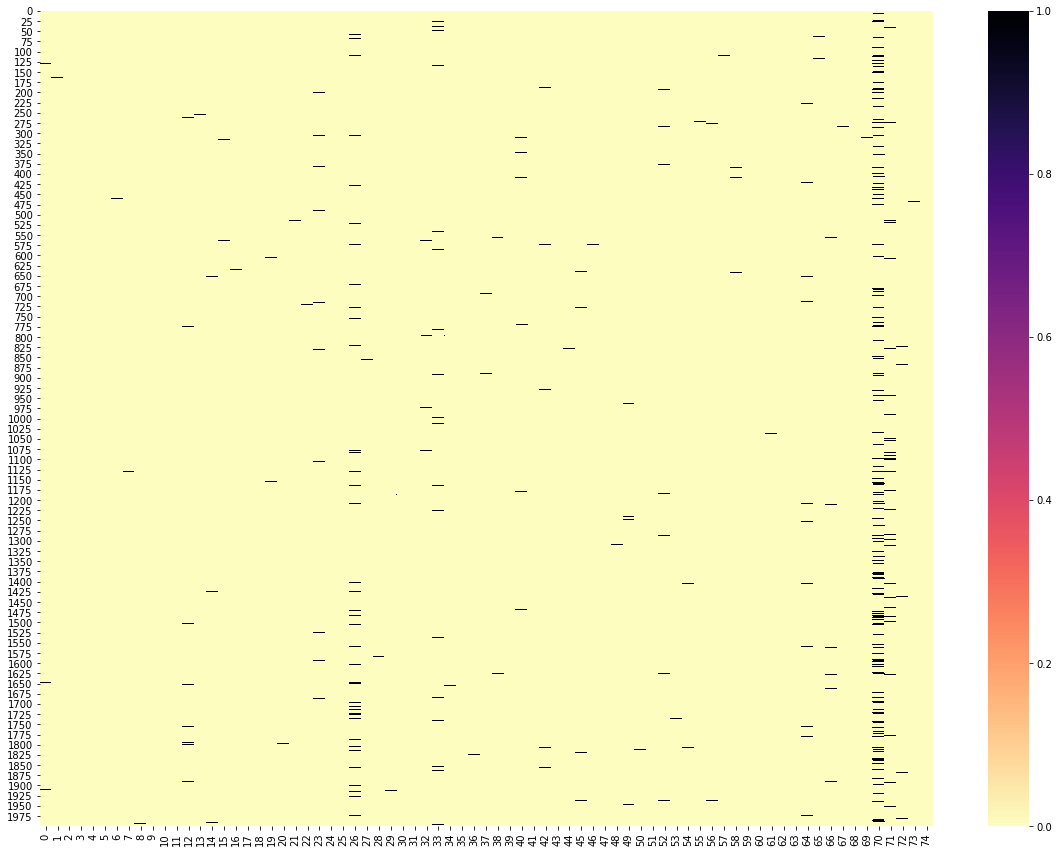

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(count_word2[0:2000,6440:6515], vmin=0, vmax=1,cmap='magma_r')